In [75]:
import pandas as pd

In [76]:
data = pd.read_csv("C:/Users/김나영/Desktop/maechul.csv", encoding = "utf-8")
data.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300011,일반의류,6.659992e+10,1040170,...,50747,291189,748981,8217,267999,332683,235257,129010,67004,291


# 점포당 매출액이 큰 상권 뽑기

### 강남을 포함하는 상권명만 

In [77]:
data = pd.merge(data, data_info, how='inner', on='상권_코드')
data = data[data['시군구_코드']==11680]
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드_x,상권_구분_코드_명_x,상권_코드,상권_코드_명_x,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,점포수,기준_년월_코드,상권_구분_코드_y,상권_구분_코드_명_y,상권_코드_명_y,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300011,일반의류,6.659992e+10,1040170,...,291,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN
1,2020,1,U,관광특구,1001496,강남 마이스 관광특구,CS300011,일반의류,5.520774e+10,846829,...,296,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN
2,2020,1,U,관광특구,1001496,강남 마이스 관광특구,CS300022,화장품,2.753157e+10,255791,...,56,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN
3,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300022,화장품,2.148548e+10,190038,...,54,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN
4,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.040091e+10,5270,...,5,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN


### 상권별로 합치기

In [78]:
data = data[(data['기준_년_코드'] == 2020) & (data['기준_분기_코드'] == 2)] #2020년 2분기의 상권 

In [79]:
data = data.groupby(data['상권_코드_명_x']).sum()
data.head()

,기준_년_코드,기준_분기_코드,상권_코드,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
상권_코드_명_x,,,,,,,,,,,,,,,,,,,,,
강남 마이스 관광특구,68680,68,34050864,1.671959e+11,3957523,2564,837,553,469,467,...,728096,432250,226592,863,6861540,6980540,15154718,397120,397139720,0.0
강남개포시장,48480,48,24035400,3.526016e+09,175840,1840,562,306,343,363,...,44151,39632,17305,124,4843440,4945560,10639440,280320,280336080,0.0
강남구 논현역_2,103020,102,51055845,9.164386e+10,3631847,4069,1032,749,705,969,...,558648,354432,178017,1141,10292310,10312608,22715400,595680,595706571,0.0
강남구 논현역_3,40400,40,20022000,1.306983e+10,243314,1709,294,357,268,365,...,40991,31316,11118,76,4036200,4038620,8916960,233600,233610420,0.0
강남구 신사역_2,70700,70,35039095,5.509073e+10,1313174,2902,599,566,591,584,...,203506,138606,62726,435,7063350,7072975,15623300,408800,408818235,0.0


In [80]:
data['점포당매출액'] = data['당월_매출_금액']/data['점포수']
data.head()

,기준_년_코드,기준_분기_코드,상권_코드,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보,점포당매출액
상권_코드_명_x,,,,,,,,,,,,,,,,,,,,,
강남 마이스 관광특구,68680,68,34050864,1.671959e+11,3957523,2564,837,553,469,467,...,432250,226592,863,6861540,6980540,15154718,397120,397139720,0.0,1.937380e+08
강남개포시장,48480,48,24035400,3.526016e+09,175840,1840,562,306,343,363,...,39632,17305,124,4843440,4945560,10639440,280320,280336080,0.0,2.843562e+07
강남구 논현역_2,103020,102,51055845,9.164386e+10,3631847,4069,1032,749,705,969,...,354432,178017,1141,10292310,10312608,22715400,595680,595706571,0.0,8.031889e+07
강남구 논현역_3,40400,40,20022000,1.306983e+10,243314,1709,294,357,268,365,...,31316,11118,76,4036200,4038620,8916960,233600,233610420,0.0,1.719715e+08
강남구 신사역_2,70700,70,35039095,5.509073e+10,1313174,2902,599,566,591,584,...,138606,62726,435,7063350,7072975,15623300,408800,408818235,0.0,1.266454e+08


### 시각화

In [81]:
import pandas as pd
import numpy as np
import matplotlib as mpl #파이썬 내의 데이터 활용
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 대처

In [82]:
#인덱스 제거
data = data.reset_index()
data.head(1)

,상권_코드_명_x,기준_년_코드,기준_분기_코드,상권_코드,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보,점포당매출액
0,강남 마이스 관광특구,68680,68,34050864,1.671959e+11,3957523,2564,837,553,469,...,432250,226592,863,6861540,6980540,15154718,397120,397139720,0.0,1.937380e+08


In [83]:
data = data[['상권_코드_명_x', '점포당매출액']]
data.head()

,상권_코드_명_x,점포당매출액
0,강남 마이스 관광특구,1.937380e+08
1,강남개포시장,2.843562e+07
2,강남구 논현역_2,8.031889e+07
3,강남구 논현역_3,1.719715e+08
4,강남구 신사역_2,1.266454e+08


In [84]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = r'C:/Users/김나영/Desktop/데잇걸즈/NanumBarunpenR.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\b

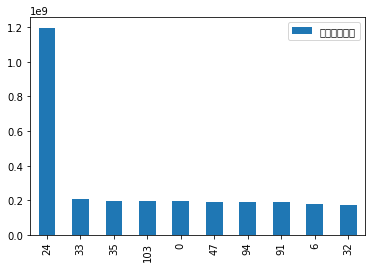

In [85]:
data.sort_values(by=['점포당매출액'],ascending=False).head(10).plot(kind='bar')

In [86]:
data.loc[[24,33,35,103,0,47,94,91,6,32]]

,상권_코드_명_x,점포당매출액
24,논현종합시장,1.198920e+09
33,도산대로81길,2.064229e+08
35,매봉역,1.956132e+08
103,코엑스,1.937380e+08
0,강남 마이스 관광특구,1.937380e+08
47,삼성로64길,1.903279e+08
94,은마아파트입구사거리_4,1.870566e+08
91,은마아파트입구사거리_1,1.863212e+08
6,강남대로136길,1.795530e+08
32,도산대로50길,1.727955e+08


## 구단위로 분석하기 

In [122]:
data = pd.read_csv("C:/Users/김나영/Desktop/maechul.csv", encoding = "utf-8")
data.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300011,일반의류,6.659992e+10,1040170,...,50747,291189,748981,8217,267999,332683,235257,129010,67004,291


In [123]:
data = pd.merge(data, data_info, how='inner', on='상권_코드') #시군구 코드 알기 위해 inner join

In [124]:
data = data[(data['기준_년_코드'] == 2020) & (data['기준_분기_코드'] == 2)]

In [125]:
data.head(3)

,기준_년_코드,기준_분기_코드,상권_구분_코드_x,상권_구분_코드_명_x,상권_코드,상권_코드_명_x,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,점포수,기준_년월_코드,상권_구분_코드_y,상권_구분_코드_명_y,상권_코드_명_y,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300011,일반의류,6.659992e+10,1040170,...,291,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN
3,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300022,화장품,2.148548e+10,190038,...,54,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN
4,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.040091e+10,5270,...,5,201810,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,NaN


In [126]:
data = data.groupby(data['시군구_코드']).sum()

In [127]:
data = data[['당월_매출_금액','당월_매출_건수', '점포수']]

In [128]:
data

,당월_매출_금액,당월_매출_건수,점포수
시군구_코드,,,
11110,1.150410e+12,40771406,19522
11140,1.816673e+12,65399704,44874
11170,1.754126e+12,25595426,11328
11200,4.255385e+11,19787350,5523
11215,5.265758e+11,24771382,8395
11230,7.524359e+11,29583106,8415
11260,2.769076e+11,15765852,5685
11290,2.778272e+11,17185181,5968
11305,3.443276e+11,17035678,5724


In [129]:
data['점포당매출액'] = data['당월_매출_금액']/data['점포수']
data.head()

,당월_매출_금액,당월_매출_건수,점포수,점포당매출액
시군구_코드,,,,
11110,1.150410e+12,40771406,19522,5.892891e+07
11140,1.816673e+12,65399704,44874,4.048387e+07
11170,1.754126e+12,25595426,11328,1.548487e+08
11200,4.255385e+11,19787350,5523,7.704843e+07
11215,5.265758e+11,24771382,8395,6.272494e+07


In [130]:
data = data.reset_index()
data.head(1)

,시군구_코드,당월_매출_금액,당월_매출_건수,점포수,점포당매출액
0,11110,1.150410e+12,40771406,19522,5.892891e+07


In [131]:
data.sort_values(by=['점포당매출액'],ascending=False).head(10)

,시군구_코드,당월_매출_금액,당월_매출_건수,점포수,점포당매출액
2,11170,1.754126e+12,25595426,11328,1.548487e+08
19,11590,7.355959e+11,32209605,7089,1.037658e+08
17,11545,7.322385e+11,24970184,7715,9.491102e+07
22,11680,2.962538e+12,99437984,31684,9.350264e+07
23,11710,1.157755e+12,46882637,12662,9.143544e+07
5,11230,7.524359e+11,29583106,8415,8.941603e+07
21,11650,1.212636e+12,48266127,14766,8.212351e+07
3,11200,4.255385e+11,19787350,5523,7.704843e+07
18,11560,8.429377e+11,35744691,10979,7.677727e+07
13,11440,9.122228e+11,41372725,12194,7.480915e+07


In [132]:
#시군구코드와 구이름 연결하기 위한 data set
data_name = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/시군구코드.csv", encoding = "utf-8")
data_name

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM
0,11110,Jongno-gu,종로구
1,11140,Jung-gu,중구
2,11170,Yongsan-gu,용산구
3,11200,Seongdong-gu,성동구
4,11215,Gwangjin-gu,광진구
...,...,...,...
245,48870,Hamyang-gun,함양군
246,48880,Geochang-gun,거창군
247,48890,Hapcheon-gun,합천군
248,50110,Jeju-si,제주시


In [133]:
data_name.columns = ['시군구_코드','영문이름','구이름'] #칼럼 이름 맞춰주기 

In [134]:
data = pd.merge(data, data_name, how='inner', on='시군구_코드') #시군구 코드 알기 위해 inner join

In [135]:
data.sort_values(by=['점포당매출액'],ascending=False).head(5)[['구이름','점포당매출액']]

,구이름,점포당매출액
2,용산구,1.548487e+08
19,동작구,1.037658e+08
17,금천구,9.491102e+07
22,강남구,9.350264e+07
23,송파구,9.143544e+07


## 전력사용으로 주거지 알아내기

In [114]:
data = pd.read_csv("D:/데잇걸즈/covid-data/구별용도별전력사용.csv", encoding = "utf-8")

In [115]:
data['사업자대비가정'] = data['가정용'] / data['사업자용']

In [120]:
data.sort_values(by=['사업자대비가정'],ascending=False).head(5)[['자치구','사업자대비가정']]

,자치구,사업자대비가정
12,서대문구,1511.791519
2,용산구,474.610778
8,강북구,412.873431
7,성북구,407.081211
19,동작구,399.188474


# 회귀분석 - 변수 표준화

In [3]:
import pandas as pd

ols('price ~ scale(length) + scale(width))', data=df.fit().summary()

### data1: 집객시설 수 

In [98]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/jipgag.csv", encoding='utf-8')
data = data[(data['기준_년_코드'] == 2019) & (data['기준_분기_코드'] == 2)]
data = data.fillna(0)
data1 = data[['상권_코드_명','집객시설_수']]

,상권_코드_명,집객시설_수
5848,장한로14길,2
5849,명동 남대문 북창동 다동 무교동 관광특구,593
5850,이태원 관광특구,144
5851,길동복조리시장,17
5852,둔촌역전통시장,36


### data2 : 상주인구 수 

In [100]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/서울시 우리마을가게 상권분석서비스(상권_상주인구).csv", encoding='utf-8')
data = data[(data['기준_년_코드'] == 2019) & (data['기준_분기_코드'] == 2)]
data_sangju = data[['상권 코드 명','총 상주인구 수']]
data_sangju.columns = ['상권코드명', '상주인구']
data_sangju

,상권코드명,상주인구
5927,강남 마이스 관광특구,26
5928,잠실 관광특구,7083
5929,종로?청계 관광특구,1930
5930,동대문패션타운 관광특구,2012
5931,명동 남대문 북창동 다동 무교동 관광특구,1118
...,...,...
7403,백석동길,1694
7404,명륜길,1453
7405,돈화문로11가길,1214
7406,난계로27길,841


### data3: 직장인구 수 

In [105]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/상권 내 직장인구_우리마을가게 상권분석서비스.csv", encoding='utf-8')
data = data[(data['기준_년월_코드'] == 2019) & (data['기준_분기_코드'] == 2)]
data_jigjang = data[['상권_코드_명','총_직장_인구_수']]
data_jigjang.columns = ['상권코드명','직장인구']

데이터 합치기

In [27]:
data = pd.merge(data1, data2, how='inner', on='상권_코드_명')

In [21]:
data = pd.merge(data, data3, how = 'inner', on = '상권_코드_명')

In [22]:
data

,상권_코드_명,집객시설_수,상주인구,총_직장_인구_수
0,장한로14길,2,1457,204
1,명동 남대문 북창동 다동 무교동 관광특구,593,1118,133878
2,이태원 관광특구,144,5396,5797
3,길동복조리시장,17,3178,431
4,둔촌역전통시장,36,613,188
...,...,...,...,...
1444,중앙로47길,1,1901,79
1445,창신5길,4,1293,22
1446,양지길,2,1787,10
1447,통일로12길,4,925,7


In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [71]:
data1 = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/면적을 모아보자.csv", encoding='utf-8')
data1.head()

,Unnamed: 0,상권_코드_명,면적(제곱미터),면적(ha),집객시설_수,총_유동인구_수
0,0,서울 강서구 발산역,76906.61,7.690661,30,262431.50
1,1,한강대로43길,69370.96,6.937096,13,524184.00
2,2,중앙로47길,92025.97,9.202597,1,992348.25
3,3,우림골목시장,88311.30,8.831130,43,501255.50
4,4,응암로1길,105152.08,10.515208,18,834306.00


In [72]:
data1.columns = ['인덱스','상권코드명','면적cm','면적ha','집객시설수','유동인구']

In [73]:
data2 = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/면적_50개_매출_수정.csv", encoding='utf-8')
data.head()

,상권코드명,면적(제곱미터),면적(ha),매출액
0,서울 강서구 발산역,76906.61,7.690661,2.320487e+09
1,한강대로43길,69370.96,6.937096,5.244927e+08
2,중앙로47길,92025.97,9.202597,1.138567e+08
3,우림골목시장,88311.30,8.831130,4.349348e+08
4,응암로1길,105152.08,10.515208,1.748821e+08


## data3 : 상권코드명, 면적, 집객시설수, 매출액, 유동인구수

In [77]:
data3 = pd.merge(data1, data2, how = 'inner', on = '상권코드명')

In [79]:
data3 = data3[['상권코드명','면적cm','면적ha','집객시설수','유동인구','매출액']]

In [ ]:
data3 = pd.merge(data1, data2, how = 'inner', on = '상권코드명')

### 합본1

In [169]:
data4 = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/합본.csv")
data4.columns = ['인덱스','상권코드명','매출액','상주인구','면적cm','면적ha','집객시설','유동인구','집객시설배후지']
data4.head()

,인덱스,상권코드명,매출액,상주인구,면적cm,면적ha,집객시설,유동인구,집객시설배후지
0,0,서울 강서구 발산역,2.320487e+09,107,76906.61,7.690661,30,262431.50,0
1,1,한강대로43길,5.244927e+08,1590,69370.96,6.937096,13,524184.00,105
2,2,중앙로47길,1.138567e+08,1901,92025.97,9.202597,1,992348.25,104
3,3,우림골목시장,4.349348e+08,2088,88311.30,8.831130,43,501255.50,0
4,4,응암로1길,1.748821e+08,3845,105152.08,10.515208,18,834306.00,106


In [185]:
data_jigjang = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/직장인구.csv")
data_jigjang[['상권_코드_명', '총_직장_인구_수']]
data_jigjang.rename(columns={"총_직장_인구_수":"직장인구"}, inplace=True)
data_jigjang.rename(columns={"상권_코드_명":"상권코드명"}, inplace=True)

In [186]:
data_jigjang

,Unnamed: 0,기준_년월_코드,상권코드명,직장인구
0,0,2019,가락시장,61.000000
1,1,2019,가로공원로58길,97.250000
2,2,2019,가로공원로76가길,181.000000
3,3,2019,가로공원로80길,324.750000
4,4,2019,가리봉시장,9.333333
...,...,...,...,...
1489,1489,2019,휘경로2길,142.000000
1490,1490,2019,휘경로3길,156.250000
1491,1491,2019,흑석로13길,76.250000
1492,1492,2019,흑석로9길,99.500000


In [187]:
data_final = pd.merge(data4, data_jigjang, how = 'inner', on = '상권코드명')

In [188]:
data_final = data_final.drop(columns=['Unnamed: 0', '인덱스'])
data_final

,상권코드명,매출액,상주인구,면적cm,면적ha,집객시설,유동인구,집객시설배후지,기준_년월_코드,직장인구
0,서울 강서구 발산역,2.320487e+09,107,76906.61,7.690661,30,262431.50,0,2019,1467.00
1,한강대로43길,5.244927e+08,1590,69370.96,6.937096,13,524184.00,105,2019,1840.50
2,중앙로47길,1.138567e+08,1901,92025.97,9.202597,1,992348.25,104,2019,72.25
3,우림골목시장,4.349348e+08,2088,88311.30,8.831130,43,501255.50,0,2019,404.50
4,응암로1길,1.748821e+08,3845,105152.08,10.515208,18,834306.00,106,2019,651.50
5,한천로132길,2.014088e+08,1823,69197.11,6.919711,15,982036.50,123,2019,141.50
6,남부순환로79길,1.231795e+08,710,80805.23,8.080523,12,473283.00,84,2019,191.50
7,서울 강남구 선릉역_2,1.172189e+09,2167,76553.84,7.655384,75,1335561.75,0,2019,34239.25
8,천중로51길,2.206648e+08,4505,102045.08,10.204508,28,2080908.25,120,2019,751.25
9,증가로6길,1.962032e+08,3064,92086.23,9.208623,6,809308.75,92,2019,358.75


In [113]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [213]:
model = smf.ols(formula = '면적ha~ 유동인구', data = data_final)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   면적ha   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     18.41
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           8.58e-05
Time:                        17:40:35   Log-Likelihood:                -107.78
No. Observations:                  50   AIC:                             219.6
Df Residuals:                      48   BIC:                             223.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1782      0.577      8.975      0.000       4.018       6.338
유동인구          3.2e-06   7.46e-07      4.291      0.000     1.7e-06     4.7e-06
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.473
Skew:                          -0.034   Prob(JB):                        0.789
Kurtosis:                       2.529   Cond. No.                     1.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 예측해보자

예측용 데이터

In [192]:
data_predict = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/예측용 자료.csv")

In [193]:
data_predict.head()

,Unnamed: 0,상권코드명,직장인구,집객시설,상주인구
0,0,가로공원로58길,97.250000,4,2349
1,1,가로공원로76가길,181.000000,9,3221
2,2,가로공원로80길,324.750000,4,2881
3,3,가리봉시장,9.333333,2,256
4,4,가마산로61길,67.500000,5,1912


In [194]:
data_predict = data_predict.drop(columns = ['Unnamed: 0'])
data_predict.head(1)

,상권코드명,직장인구,집객시설,상주인구
0,가로공원로58길,97.25,4,2349


In [206]:
result.predict(data_predict)

0       6.688214
1       7.959929
2       7.298410
3       4.178958
4       6.241291
          ...   
1444    6.304249
1445    7.624373
1446    5.125385
1447    6.430944
1448    6.344504
Length: 1449, dtype: float64

In [207]:
data_predict['predict'] = result.predict(data_predict)
data_predict.head(1)

,상권코드명,직장인구,집객시설,상주인구,predict
0,가로공원로58길,97.25,4,2349,6.688214


In [209]:
data_predict.to_excel('면적예측2.xlsx')